In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Analyse exploratoire des données

In [ ]:
nightlight_data= pd.read_csv('/content/drive/MyDrive/PFA/data/DHS_nightlights.csv')

In [ ]:
nightlight_data[nightlight_data['wealth']==-0.831240]

,id,max_,min_,mean_,median_,std_,wealth
0,1.0,0.0,0.0,0.0,0.0,0.0,-0.83124


In [ ]:
nightlight_data['wealth'].value_counts(sort=True)

-0.831240    1
-0.793805    1
-0.323100    1
-0.260530    1
-0.435370    1
            ..
-0.595175    1
-0.624690    1
 0.174010    1
 1.232290    1
 1.242605    1
Name: wealth, Length: 600, dtype: int64

In [ ]:
nightlight_data.head()

,id,max_,min_,mean_,median_,std_,wealth
0,1.0,0.0,0.0,0.00,0.0,0.000000,-0.831240
1,2.0,0.0,0.0,0.00,0.0,0.000000,-0.739180
2,3.0,0.0,0.0,0.00,0.0,0.000000,-0.786210
3,4.0,13.0,0.0,1.31,0.0,3.148635,-0.447090
4,5.0,0.0,0.0,0.00,0.0,0.000000,-0.687435


In [ ]:
nightlight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       600 non-null    float64
 1   max_     600 non-null    float64
 2   min_     600 non-null    float64
 3   mean_    600 non-null    float64
 4   median_  600 non-null    float64
 5   std_     600 non-null    float64
 6   wealth   600 non-null    float64
dtypes: float64(7)
memory usage: 32.9 KB


In [ ]:
nightlight_data.describe()

,id,max_,min_,mean_,median_,std_,wealth
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,300.500000,20.525000,2.763333,10.355167,9.929167,4.956461,-0.087667
std,173.349358,21.666913,7.207443,15.915010,17.244764,5.077938,0.846394
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.109330
25%,150.750000,6.000000,0.000000,0.387500,0.000000,1.446572,-0.705674
50%,300.500000,10.000000,0.000000,3.250000,0.000000,3.111846,-0.415375
75%,450.250000,31.000000,0.000000,11.425000,9.000000,6.811750,0.322688
max,600.000000,63.000000,55.000000,62.740000,63.000000,19.892974,2.940090


In [ ]:
nightlight_data.isnull().sum()

id         0
max_       0
min_       0
mean_      0
median_    0
std_       0
wealth     0
dtype: int64

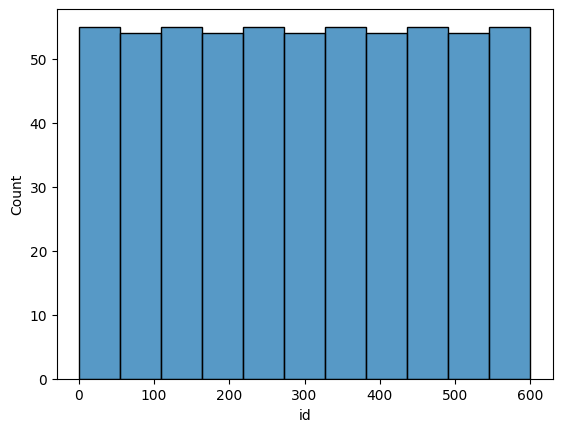

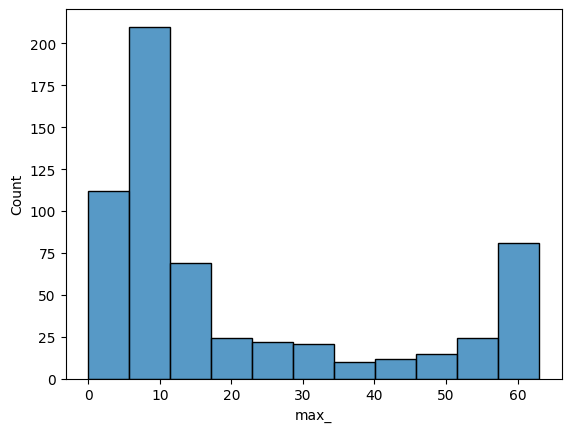

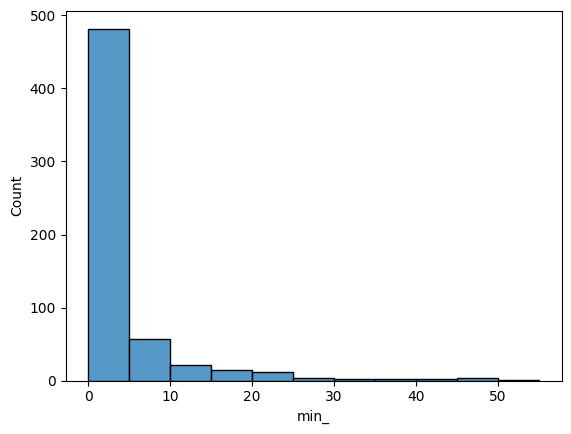

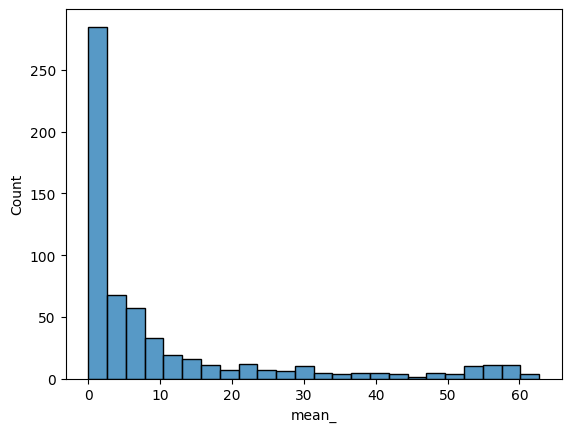

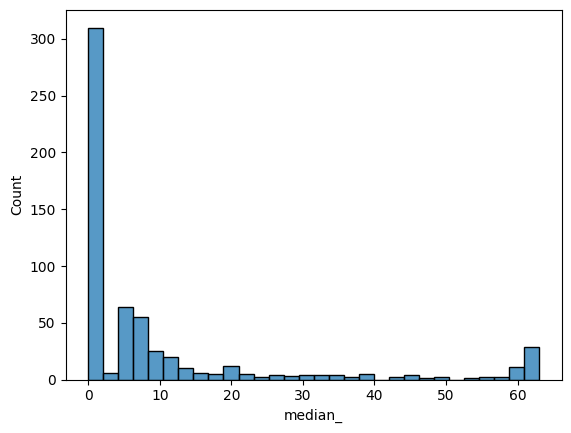

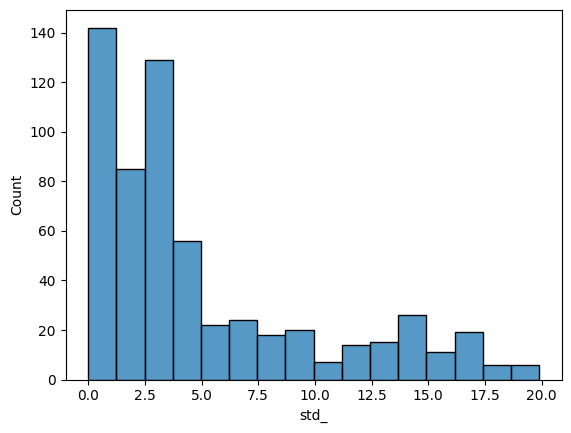

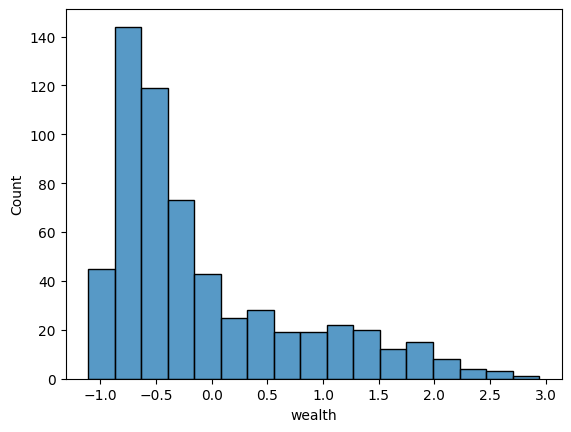

In [ ]:
for column in nightlight_data.columns:
  sns.histplot(data=nightlight_data, x=column)
  plt.show()

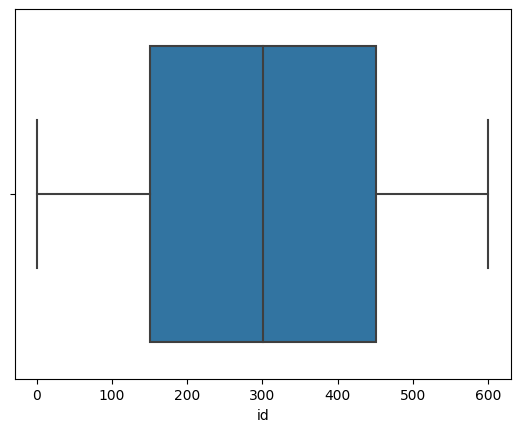

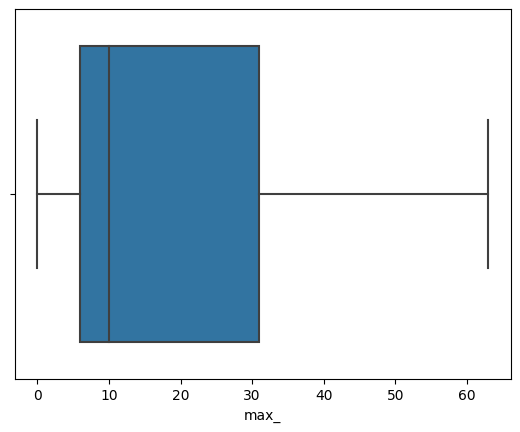

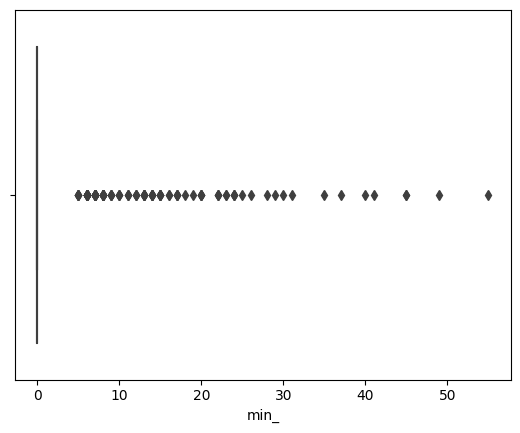

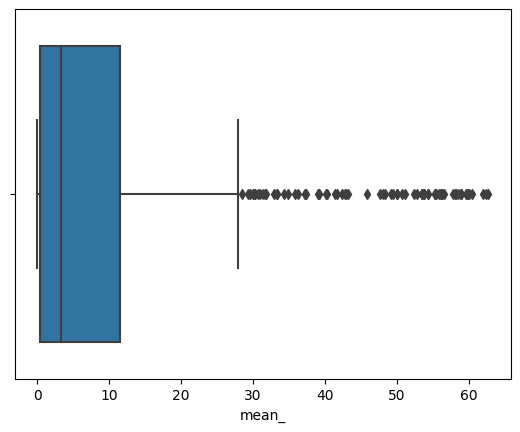

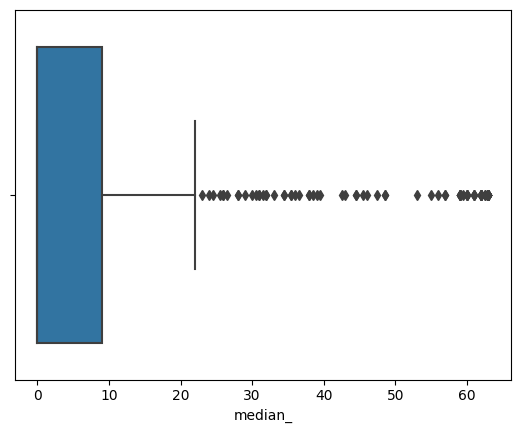

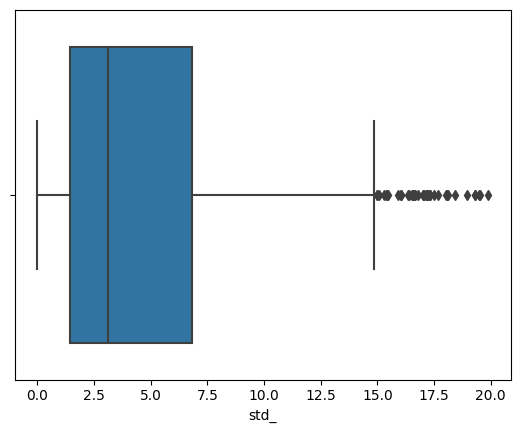

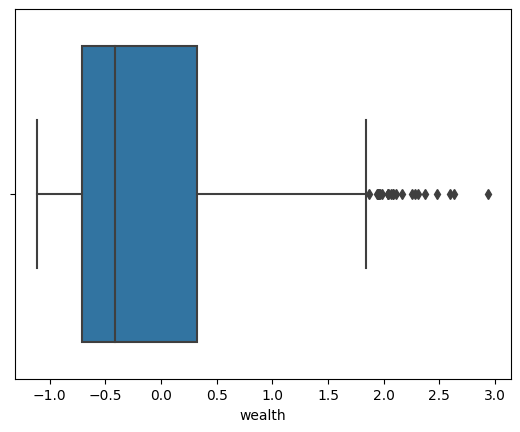

In [ ]:
for column in nightlight_data.columns:
  sns.boxplot(data=nightlight_data, x=column)
  plt.show()

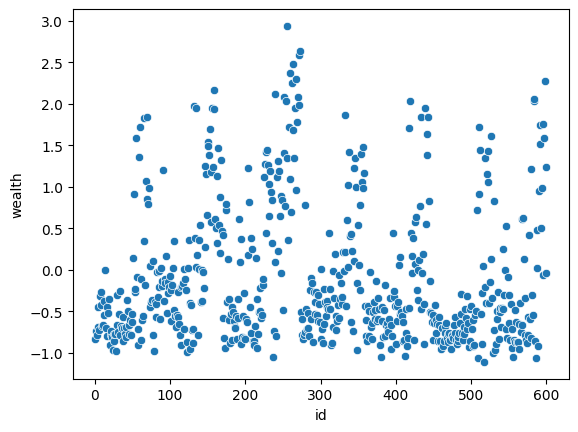

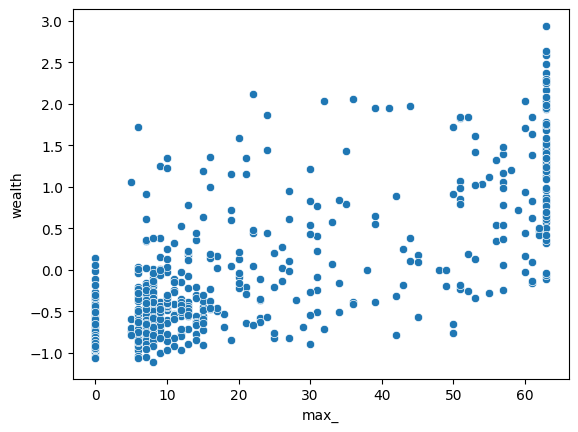

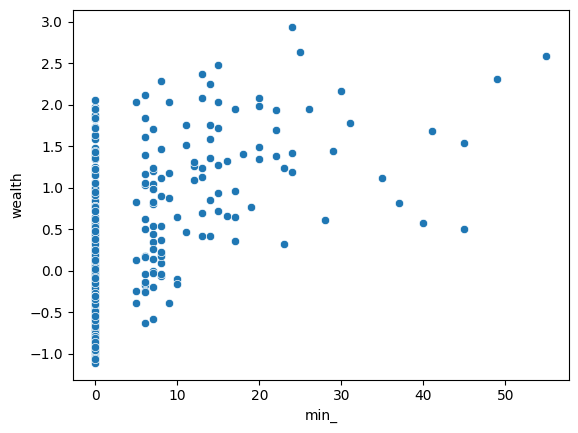

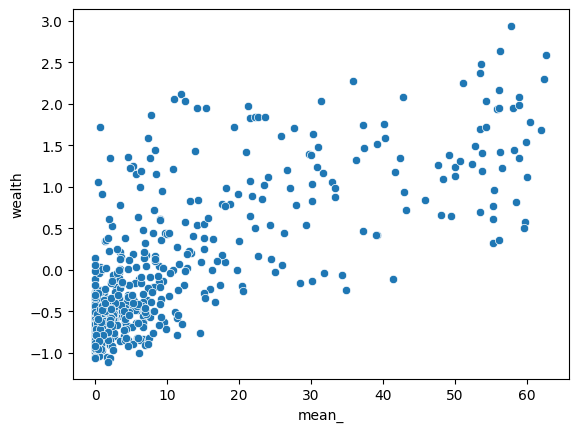

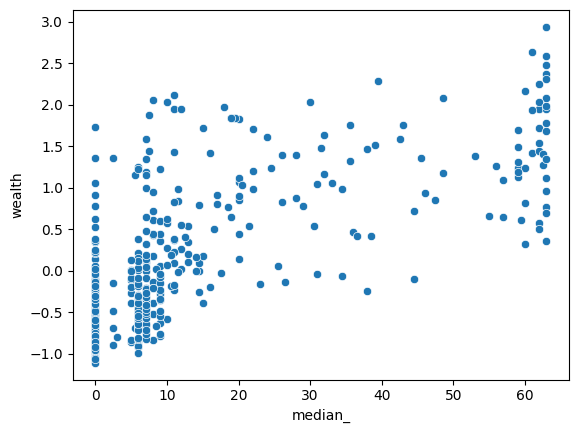

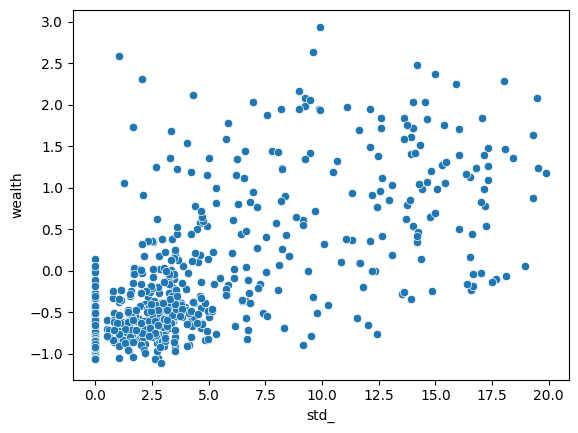

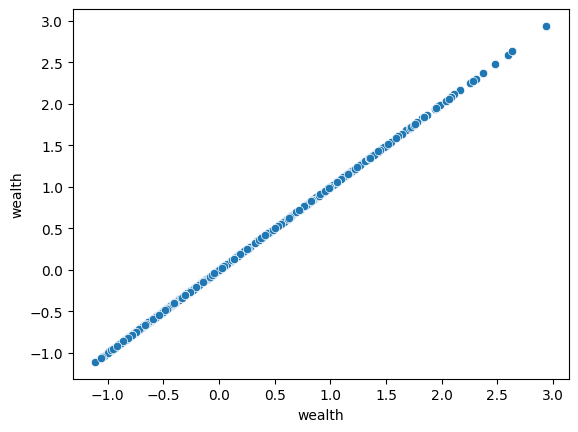

In [ ]:
for column in nightlight_data.columns:
  sns.scatterplot(data=nightlight_data, y='wealth',x=column)
  plt.show()

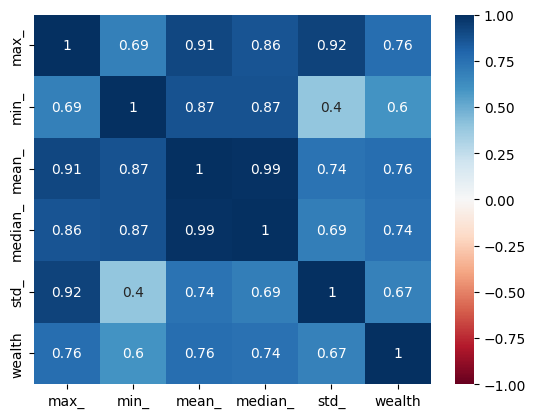

In [ ]:
sns.heatmap(nightlight_data.drop('id',axis=1).corr(),annot=True, vmin=-1, vmax=1, cmap='RdBu')
plt.show()

# Modélisation des données

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.neural_network import MLPRegressor

SEED=2
np.random.seed(SEED)

In [ ]:
X= nightlight_data.drop(['wealth','id'],axis=1)
y=nightlight_data['wealth']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED, test_size=0.2)

In [ ]:
def train_test_model(X_train,X_test,y_train,y_test,model):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  results=pd.DataFrame(index=[model.__class__.__name__])
  results['RMSE']= MSE(y_test,y_pred)**0.5
  results['R2']= r2_score(y_test,y_pred)
  display(results)



In [ ]:
lr = LinearRegression()
ridge= Ridge()
lasso = Lasso()
elasticnet=ElasticNet()
gradient_boost=GradientBoostingRegressor(n_estimators=300,random_state=SEED)
rf= RandomForestRegressor(random_state=SEED)
knn= KNeighborsRegressor(n_neighbors=2)
nn= MLPRegressor(hidden_layer_sizes=(5, 2), random_state=SEED,max_iter=500)
tree = DecisionTreeRegressor(random_state=SEED)

models=[ lr , ridge , lasso,elasticnet, gradient_boost , rf , knn , nn , tree]
for model in models:
  train_test_model(X_train, X_test, y_train, y_test, model)

,RMSE,R2
LinearRegression,0.520555,0.633658


,RMSE,R2
Ridge,0.520575,0.633631


,RMSE,R2
Lasso,0.539976,0.605814


,RMSE,R2
ElasticNet,0.534462,0.613823


,RMSE,R2
GradientBoostingRegressor,0.622,0.476961


,RMSE,R2
RandomForestRegressor,0.571998,0.557674


,RMSE,R2
KNeighborsRegressor,0.621954,0.477039


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,RMSE,R2
MLPRegressor,0.587446,0.533461


,RMSE,R2
DecisionTreeRegressor,0.76395,0.210989


In [ ]:
def hyperparameter_tune(X_train,X_test,y_train,y_test,model, params):
  clf= GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
  clf.fit(X_train,y_train)
  tuned_model=clf.best_estimator_
  y_pred = tuned_model.predict(X_test)
  results=pd.DataFrame(index=[model.__class__.__name__])
  results['RMSE']= MSE(y_test,y_pred)**0.5
  results['R2']= r2_score(y_test,y_pred)
  display(results)



In [ ]:
lr_param_grid = {'fit_intercept': [True, False]}

ridge_param_grid = {'alpha': np.arange(0.1,5,0.2), 'fit_intercept': [True, False]}

lasso_param_grid = {'alpha': np.arange(0.1,5,0.2), 'fit_intercept': [True, False]}

elasticnet_param_grid = {'alpha': np.arange(0.1,5,0.2), 'l1_ratio': [0.2, 0.5, 0.8], 'fit_intercept': [True, False]}

gradient_boost_param_grid = {'n_estimators': [100, 200, 300], 'learning_rate': np.arange(0.1,1,0.1), 'max_depth': [3, 4, 5],'random_state':[SEED]}

rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5],'random_state':[SEED]}

knn_param_grid = {'n_neighbors': [2, 3, 4, 5]}

nn_param_grid = {'hidden_layer_sizes': [(5,), (10,), (5, 2), (10, 5)], 'activation': ['relu', 'tanh'], 'alpha': [0.01,0.02], 'max_iter': [100,500],'random_state':[SEED]}

tree_param_grid = {'max_depth': [3, 4, 5, 6], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2],'random_state':[SEED]}


In [ ]:
models = {'Linear Regression': (lr, lr_param_grid),
          'Ridge Regression': (ridge, ridge_param_grid),
          'Lasso Regression': (lasso, lasso_param_grid),
          'ElasticNet Regression': (elasticnet, elasticnet_param_grid),
          'Gradient Boosting': (gradient_boost, gradient_boost_param_grid),
          'Random Forest': (rf, rf_param_grid),
          'K-Nearest Neighbors': (knn, knn_param_grid),
          'Multi-layer Perceptron': (nn, nn_param_grid),
          'Decision Tree': (tree, tree_param_grid)}
for name, (model, param_grid) in models.items():
    print("Tuning hyperparameters for", name)
    hyperparameter_tune(X_train,X_test,y_train,y_test,model, param_grid)


Tuning hyperparameters for Linear Regression


,RMSE,R2
LinearRegression,0.520555,0.633658


Tuning hyperparameters for Ridge Regression


,RMSE,R2
Ridge,0.520651,0.633524


Tuning hyperparameters for Lasso Regression


,RMSE,R2
Lasso,0.53282,0.616191


Tuning hyperparameters for ElasticNet Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.058e-02, tolerance: 2.575e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.299e-02, tolerance: 2.784e-02
  model = cd_fast.enet_coordinate_descent(


,RMSE,R2
ElasticNet,0.531699,0.617806


Tuning hyperparameters for Gradient Boosting


,RMSE,R2
GradientBoostingRegressor,0.576205,0.551144


Tuning hyperparameters for Random Forest


,RMSE,R2
RandomForestRegressor,0.527963,0.623158


Tuning hyperparameters for K-Nearest Neighbors


,RMSE,R2
KNeighborsRegressor,0.557523,0.579778


Tuning hyperparameters for Multi-layer Perceptron


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

,RMSE,R2
MLPRegressor,0.483684,0.683717


Tuning hyperparameters for Decision Tree


,RMSE,R2
DecisionTreeRegressor,0.532569,0.616554


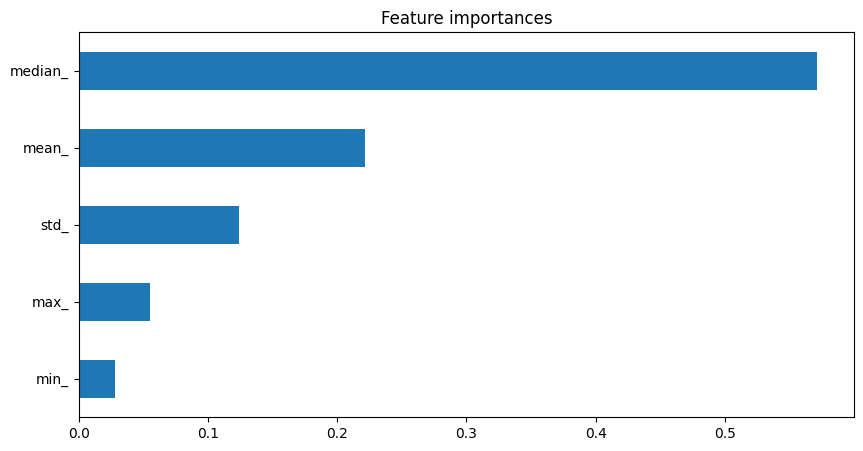

In [ ]:
rf = RandomForestRegressor(random_state=SEED)
rf.fit(X, y)
importances = rf.feature_importances_
importance= pd.Series(importances,index= X.columns).sort_values()
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
plt.title("Feature importances")
importance.plot(kind='barh')
plt.show()